In [1]:
import mysql.connector
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

cnx = mysql.connector.connect(host="127.0.0.1",user="Tim",passwd="Turion162!",db="maze")

In [3]:
sessionid = 1025

cursor = cnx.cursor()
query = ("""
        SELECT distinct timestamp FROM maze.session_detail as sd 
INNER JOIN mouses_sessions as ms on sd.mouses_id = ms.mouses_id
where event_value = 4 and sd.session_id = %s;
          """)
Add= (sessionid,)
cursor.execute(query, Add)
result=cursor.fetchall()
cursor.close()
Storage = np.asarray(result)

In [4]:
ArrayIntervals =  np.zeros((0, 1)) 
for I in range(len(Storage)):
    if I > 0:
        Value = Storage[I]-Storage[I-1]
        ArrayIntervals = np.append(ArrayIntervals,Value)
print(ArrayIntervals)

[97624. 28391. 13038. 16775.  9005. 11230. 21932.  5750.  5591.  6296.
  5529.  6043.  5388.  4660.  5273.  4821.  5274.  4711.  5163.  4922.
  4253.  4609.  5131.  4232.  4331.  4264.  7527.  6283.  4796.  4229.
  4607.  4553.  5030.  4168.  4060.  4388.  4314.  7152.  5156.  4338.
  4946.  4483.  4371.  4695.  4565. 14226.  4677.  4556.  4644.  4824.
  5057.  4501.  5819.  3952.  4894.  4889.  4297.  4238.  5075.  4116.
  4523.  4621. 10871.  3903.  4125.  4040.  5870.  4655.  4283.  4861.
  4249.  4009.  4024.  4820.  4144.  4213.  4166.  7739.  6675.  4343.
  4280.  5263.  4171.  5042.  4291.]


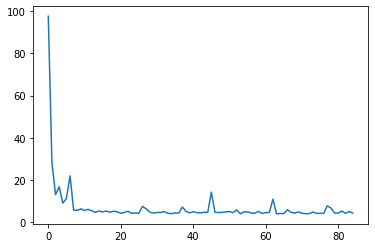

In [5]:
plt.plot(ArrayIntervals/1000)
plt.show()